In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import requests
from bs4 import BeautifulSoup
import re
import time
import os

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


In [2]:
from konlpy.tag import Okt
from collections import Counter
import pytagcloud
from IPython.display import Image
import re

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


## 데이터를 읽어온다

In [3]:
df = pd.read_csv('big_da.csv')
df

,title,description
0,&quot;고맙다 <b>빅데이터</b> 팀장&quot;…이랜드 봄 신상 줄 대박,이랜드그룹이 지난겨울과 올봄 신제품을 선보이며 ‘<b>빅데이터</b>’에 물어본 예...
1,"대전시, 교통카드 <b>빅데이터</b> 활용해 대중교통 노선 분석한다",대전시는 교통카드 <b>빅데이터</b>를 활용한 대중교통 노선분석시스템을 본격 운영...
2,"대구시-DIP, <b>빅데이터</b> 전문가 720명 양성…전년比 3배↑",대구시와 대구디지털산업진흥원(DIP)이 올해 <b>빅데이터</b> 전문인력 양성교육...
3,대전시 '<b>빅데이터</b> 활용한 대중교통 분석시스템' 본격 운영,대전시는 '교통카드 <b>빅데이터</b>를 활용한 대중교통 분석시스템'을 본격 운영...
4,"대구시, 올해 <b>빅데이터</b> 전문인력 720명 양성",대구시와 대구디지털산업진흥원(DIP)은 작년보다 3배 이상 증가된 720명을 목표로...
...,...,...
995,"하나카드, 웰컴저축은행과 손잡고 마이<b>데이터</b> 사업 협력 추진",하나카드는 웰컴저축은행과 함께 마이데이터 사업 추진을 위한 전략적 업무협약(MOU)...
996,"[<b>빅데이터</b>MSI]시장심리 톱5, SK·두산·신한지주·삼성SDI·대우건설",12일 <b>빅데이터</b> 시장심리지수(MSI)가 가장 높은 톱5에 SK·두산·신...
997,"KTL-KED, <b>빅데이터</b> 플랫폼 구축 협약",국내 유일 공공 종합시험인증기관인 한국산업기술시험원(KTL)과 한국기업데이터(KED...
998,"건양대병원, 의료<b>데이터</b> 중심병원 선정",건양대병원(의료원장 최원준)이 보건복지부 공모 2021년 의료<b>데이터</b> 중...


## 결측치 확인

In [4]:

df.isna().sum()

title          0
description    0
dtype: int64

In [5]:
#결측치 제거
df.dropna(inplace=True)
df.isna().sum()

title          0
description    0
dtype: int64

## 한글 정제

In [6]:
# 한글 외의 문자는 모두 제거한다.
def text_clearing(text):
    # 한글 정규식
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 한글외의 모든 문자를 길이가 0인 문자열로 변환한다.
    result = hangul.sub('',text)

    return result

In [7]:
# 테스트
a1 = df['description'][0]
print(a1)
print('--')
print(text_clearing(a1))

이랜드그룹이 지난겨울과 올봄 신제품을 선보이며 ‘<b>빅데이터</b>’에 물어본 예상 히트 상품이다. 소셜미디어... 이랜드그룹은 <b>빅데이터</b> 분석 대상을 전 제품으로 확대한다는 방침이다. 이랜드그룹 관계자는 “적중률... 
--
이랜드그룹이 지난겨울과 올봄 신제품을 선보이며 빅데이터에 물어본 예상 히트 상품이다 소셜미디어 이랜드그룹은 빅데이터 분석 대상을 전 제품으로 확대한다는 방침이다 이랜드그룹 관계자는 적중률 


In [8]:
# 한글을 정제하낟.
df['title'] = df['title'].apply(lambda x: text_clearing(x))
df['description'] = df['description'].apply(lambda x : text_clearing(x))

df

,title,description
0,고맙다 빅데이터 팀장이랜드 봄 신상 줄 대박,이랜드그룹이 지난겨울과 올봄 신제품을 선보이며 빅데이터에 물어본 예상 히트 상품이다...
1,대전시 교통카드 빅데이터 활용해 대중교통 노선 분석한다,대전시는 교통카드 빅데이터를 활용한 대중교통 노선분석시스템을 본격 운영한다고 일 밝...
2,대구시 빅데이터 전문가 명 양성전년 배,대구시와 대구디지털산업진흥원이 올해 빅데이터 전문인력 양성교육을 대폭 확대 지난해보...
3,대전시 빅데이터 활용한 대중교통 분석시스템 본격 운영,대전시는 교통카드 빅데이터를 활용한 대중교통 분석시스템을 본격 운영 한다고 일 밝혔...
4,대구시 올해 빅데이터 전문인력 명 양성,대구시와 대구디지털산업진흥원은 작년보다 배 이상 증가된 명을 목표로 년 빅데이터 전...
...,...,...
995,하나카드 웰컴저축은행과 손잡고 마이데이터 사업 협력 추진,하나카드는 웰컴저축은행과 함께 마이데이터 사업 추진을 위한 전략적 업무협약을 일 체...
996,빅데이터시장심리 톱 두산신한지주삼성대우건설,일 빅데이터 시장심리지수가 가장 높은 톱에 두산신한지주삼성대우건설이 선정됐다 뉴시스...
997,빅데이터 플랫폼 구축 협약,국내 유일 공공 종합시험인증기관인 한국산업기술시험원과 한국기업데이터는 디지털 산업혁...
998,건양대병원 의료데이터 중심병원 선정,건양대병원의료원장 최원준이 보건복지부 공모 년 의료데이터 중심병원 지원사업에서 선정...


In [9]:
# 말뭉치 생성(모든 문장을 하나로 합치는 작업)
title_corpus = ''.join(df['title'].tolist())
description_corpus = ''.join(df['description'].tolist())

print(title_corpus)
print(description_corpus)


고맙다 빅데이터 팀장이랜드 봄 신상 줄 대박대전시 교통카드 빅데이터 활용해 대중교통 노선 분석한다대구시 빅데이터 전문가 명 양성전년 배대전시 빅데이터 활용한 대중교통 분석시스템 본격 운영대구시 올해 빅데이터 전문인력 명 양성대전시 빅데이터로 대중교통 분석시민서비스 향상 기대대구광역시 빅데이터 전문인력 양성 작년보다 배 확대 빅데이터 정보량 증권 가장 많아삼성 미래에셋 순빅데이터투데이 통신 상장기업 년 월 브랜드평판 분석위 텔레콤경북농업기술원 빅데이터로 참외 배 이상 생산대전시 빅데이터 활용 대중교통 분석시스템 운영대구시 빅데이터 전문인력 양성 작년 대비 배 확대한밭대대전 유성구 빅데이터센터 업무협약 체결한국경제신문국비무료빅데이터 전략 마에스트로 과정 훈련생 모집대구시 빅데이터 전문인력 양성 작년보다 배 확대대구시 빅데이터 전문인력 양성 작년보다 배 확대대전시 빅데이터 활용 대중교통 분석시스템 운영물티슈 브랜드평판 년 월 빅데이터 분석결과대구시 빅데이터 전문인력 명 양성교육작년보다 배 확대권준학 농협은행장 직원들에게 직접 빅데이터 교육 통신 상장기업 브랜드평판 월 빅데이터 분석 위빅데이터 강사 나선 권준학 농협은행장 데이터사업 진두지휘권준학 농협은행장 직원들 대상 빅데이터 교육 실시빅데이터가 알려주는 올해 집 사도 좋은 지역 집코노미빅데이터 강사로 나선 권준학 농협은행장데이터사업 진두지휘대전시 대중교통 빅데이터 분석버스노선 조정신설가톨릭대 데이터사이언스학과 신설빅데이터 인재 양성통신 상장기업 브랜드평판 월 빅데이터 분석 위는 텔레콤 위  위대전시 빅데이터 활용한 대중교통 분석시스템 본격 운영물티슈 브랜드평판 월 빅데이터 분석 위는 페넬로페 물티슈레깅스 브랜드평판 월 빅데이터 분석 위는 안다르 레깅스브랜드빅데이터연구소 인공지능 빅데이터 플랫폼 구축한다 고려대  권준학 농협은행장 빅데이터 실무 강사로 데이터사업 진두지휘빅데이터 전문기업 웨슬리퀘스트  데이터바우처 지원사업 공급기업대전시 빅데이터 활용한 대중교통 분석시스템 운영대전시 빅데이터 활용한 대중교통 분석시스템

In [10]:
# 형태소 분석
tagger = Okt()

title_nouns = tagger.nouns(title_corpus)
description_nouns = tagger.nouns(description_corpus)

print(title_nouns)
print('---------')
print(description_nouns)


['빅데이터', '팀', '랜드', '봄', '신상', '줄', '대박', '전시', '교통카드', '빅데이터', '활용', '대중교통', '노선', '분석', '다대', '구시', '빅데이터', '전문가', '명', '년', '전시', '빅데이터', '활용', '대중교통', '분석', '시스템', '본격', '운영', '대구시', '올해', '빅데이터', '전문', '인력', '명', '전시', '빅데이터', '대중교통', '분석', '시민', '서비스', '향상', '대구광역시', '빅데이터', '전문', '인력', '양성', '작년', '배', '확대', '빅데이터', '정보', '량', '증권', '가장', '삼성', '미래에셋', '빅데이터', '투데이', '통신', '상장', '기업', '년', '월', '브랜드', '평판', '분석', '위', '텔레콤', '경북', '농업', '기술', '빅데이터', '참외', '배', '이상', '생산', '전시', '빅데이터', '활용', '대중교통', '분석', '시스템', '운영', '대구시', '빅데이터', '전문', '인력', '양성', '작년', '대비', '배', '확대', '한밭대', '대전', '유성구', '빅데이터', '센터', '업무', '협약', '체결', '한국', '신문', '국비', '무료', '빅데이터', '전략', '마에스트로', '과정', '훈련', '생', '모집', '대구시', '빅데이터', '전문', '인력', '양성', '작년', '배', '확대', '대구시', '빅데이터', '전문', '인력', '양성', '작년', '배', '확대', '전시', '빅데이터', '활용', '대중교통', '분석', '시스템', '운영', '물티슈', '브랜드', '평판', '년', '월', '빅데이터', '분석', '결과', '대구시', '빅데이터', '전문', '인력', '명', '성교육', '작년', '배', '확대', '권준', '학', '농협', '은행', '직원', '직접', '빅

In [11]:
# 단어들의 빈도수를 구한다.
title_count = Counter(title_nouns)
description_count = Counter(description_nouns)

print(title_count)
print(description_count)

Counter({'빅데이터': 584, '데이터': 495, '분석': 153, '위': 130, '사업': 124, '병원': 113, '카드': 108, '선정': 100, '기업': 96, '의료': 90, '은행': 84, '활용': 80, '융합': 79, '롯데': 77, '미래에셋': 76, '대우': 74, '처': 71, '바': 70, '농협': 69, '협약': 68, '권준': 68, '학': 68, '브랜드': 65, '지원': 63, '월': 62, '평판': 62, '업무': 61, '플랫폼': 61, '비즈니스': 60, '체결': 58, '중심': 58, '마이': 56, '년': 54, '구축': 54, '공급': 52, '디지털': 50, '실무': 47, '센터': 45, '진두': 38, '지휘': 37, '기반': 37, '지능': 36, '강사': 35, '산업': 33, '저축은행': 33, '삼성': 32, '한국': 32, '인공': 32, '시스템': 31, '운영': 31, '서비스': 31, '혁신': 31, '앤': 30, '컴퍼니': 30, '하나카드': 30, '웰컴': 29, '투데이': 28, '협력': 28, '보이스피싱': 27, '교육': 26, '이랜드': 25, '시스템스': 25, '뱅크': 25, '마케팅': 25, '스': 25, '스마트': 24, '추진': 24, '등': 24, '전시': 22, '직원': 22, '회': 22, '대중교통': 20, '본격': 20, '양성': 20, '기술': 20, '신설': 20, '보건': 20, '유성구': 19, '금융': 19, '투자': 19, '국가도메인': 19, '한밭대': 18, '협의': 18, '제공': 18, '클라우드': 17, '시대': 17, '질의': 17, '손': 17, '도입': 17, '상장': 16, '공단': 16, '써머': 16, '건양대': 16, '심리': 15, '서울': 15, '상권': 15

 ## 키워드 다듬기
- 한글자인 데이터 삭제
- 불용어 데이터 삭제

In [12]:
# 한글자를 제외한 나머지를 새롭게 담아준다.
title_dict = {}
for key in title_count:
    if len(key) >1 :
        title_dict[key] = title_count[key]

description_dict = {}
for key in description_count :
    if len(key) > 1 :
        description_dict[key] = description_count[key]
        
remove_title_count = Counter(title_dict)
remove_description_count = Counter(description_dict)

In [13]:
# 불용어를 읽어온다.
with open('data10/korean_stopwords.txt', encoding = 'utf-8') as fp:
    stopwords = fp.readlines()
    
stopwords = [x.strip() for x in stopwords]
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [14]:
# 불용어를 제외한 나머지만 담아준다.
title_dict = {}
for key in remove_title_count :
    if key not in stopwords:
        title_dict[key] = remove_title_count[key]
        
description_dict={}
for key in remove_description_count:
    if key not in stopwords:
        description_dict[key] = remove_description_count[key]
        
remove_title_count = Counter(title_dict)
remove_description_count = Counter(description_dict)

In [15]:
# 손흥민 제거
del remove_title_count['빅데이터']
del remove_description_count['빅데이터']

In [16]:
print(remove_title_count)
print('-----------------')
print(remove_description_count)

Counter({'데이터': 495, '분석': 153, '사업': 124, '병원': 113, '카드': 108, '선정': 100, '기업': 96, '의료': 90, '은행': 84, '활용': 80, '융합': 79, '롯데': 77, '미래에셋': 76, '대우': 74, '농협': 69, '협약': 68, '권준': 68, '브랜드': 65, '지원': 63, '평판': 62, '업무': 61, '플랫폼': 61, '비즈니스': 60, '체결': 58, '중심': 58, '마이': 56, '구축': 54, '공급': 52, '디지털': 50, '실무': 47, '센터': 45, '진두': 38, '지휘': 37, '기반': 37, '지능': 36, '강사': 35, '산업': 33, '저축은행': 33, '삼성': 32, '한국': 32, '인공': 32, '시스템': 31, '운영': 31, '서비스': 31, '혁신': 31, '컴퍼니': 30, '하나카드': 30, '웰컴': 29, '투데이': 28, '협력': 28, '보이스피싱': 27, '교육': 26, '이랜드': 25, '시스템스': 25, '뱅크': 25, '마케팅': 25, '스마트': 24, '추진': 24, '전시': 22, '직원': 22, '대중교통': 20, '본격': 20, '양성': 20, '기술': 20, '신설': 20, '보건': 20, '유성구': 19, '금융': 19, '투자': 19, '국가도메인': 19, '한밭대': 18, '협의': 18, '제공': 18, '클라우드': 17, '시대': 17, '질의': 17, '도입': 17, '상장': 16, '공단': 16, '써머': 16, '건양대': 16, '심리': 15, '서울': 15, '상권': 15, '현대': 14, '시장': 14, '케이': 14, '코로나': 14, '성심': 14, '나선': 13, '스타트업': 13, '고객': 13, '통계청': 13, '제이': 13, '카카오': 

## 워드 클라우드로 시각화

In [17]:
# title에서 빈도수가 많은 100개의 단어를 추출한다.
rank_title_tags = remove_title_count.most_common(100)
#워드클라우드를 위한 단어사전을 생성한다.
title_taglist = pytagcloud.make_tags(rank_title_tags)
# 워드 클라우드 이미지를 생성한다.
pytagcloud.create_tag_image(title_taglist, 'son_title.jpg', size=(900,600),
                           fontname='NanumGothic', rectangular=False)

In [18]:
# description에서 빈도수가 많은 100개의 단어를 추출한다.
rank_description_tags = remove_description_count.most_common(100)
# 워드 클라우드를 위한 단어 사전을 생성한다.
description_taglist = pytagcloud.make_tags(rank_description_tags)
# 워드 클라우드 이미지를 생성한다.
pytagcloud.create_tag_image(description_taglist, 'son_description.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)


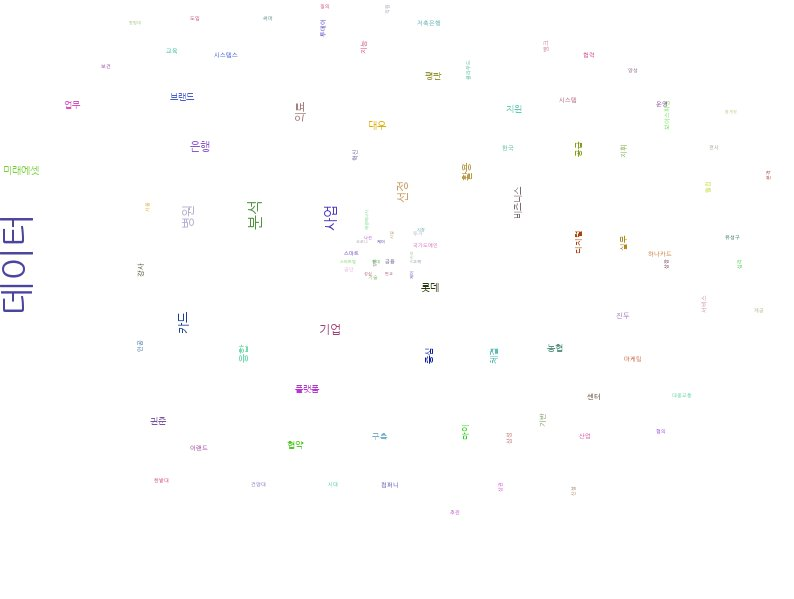

In [19]:
Image(filename='son_title.jpg')

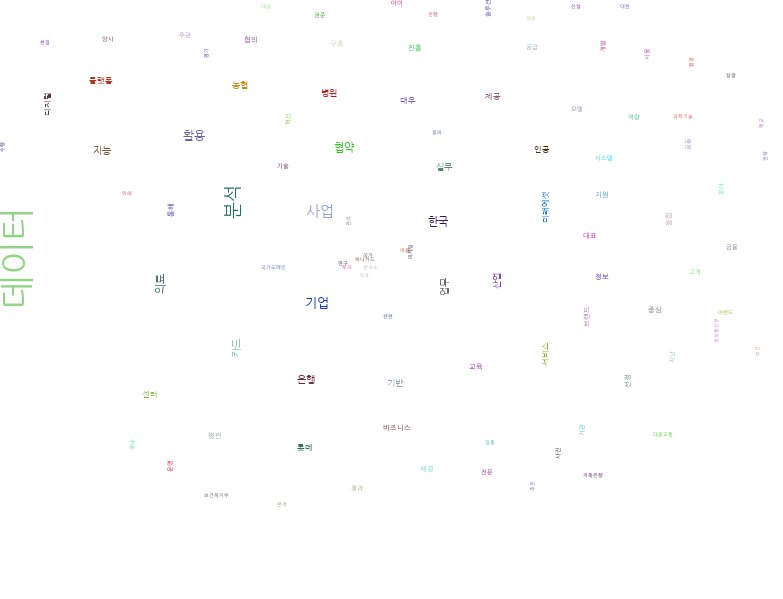

In [20]:
Image(filename='son_description.jpg')